In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [88]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Data Sains (Ivan Pakpahan)/Klasifikasi Jamur/mushrooms.csv")
data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]]
data_train = data.iloc[:-10,:]
data_test  = data.iloc[-10:,:]
data_x     = data_train.iloc[:,1:23].values
data_y     = data_train.iloc[:,0].values

In [89]:
data_x

array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['k', 's', 'w', ..., 'w', 'n', 'g'],
       ['k', 's', 'n', ..., 'b', 'v', 'l'],
       ['k', 'y', 'e', ..., 'w', 'v', 'd']], dtype=object)

In [90]:
# Encoding

# x
for i in range(21):
  data_x[: , i] = LabelEncoder().fit_transform(data_x[:,i])
# y
data_y = LabelEncoder().fit_transform(data_y)

data_x

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [3, 2, 8, ..., 7, 2, 1],
       [3, 2, 4, ..., 0, 4, 2],
       [3, 3, 2, ..., 7, 4, 0]], dtype=object)

In [91]:
# Normalize X
maxx = []
minn = []
for i in range(21):
  maxx.append(np.max(data_x[:,i]))
  minn.append(np.min(data_x[:,i]))

for i in range(14):  
  for j in range(len(data_x)):
    data_x[j , i] = (data_x[j , i]- minn[i])/(maxx[i]-minn[i])

for i in range(15,21):
  for j in range(len(data_x)):
    data_x[j , i] = (data_x[j , i]- minn[i])/(maxx[i]-minn[i])

In [93]:
data_x

array([[1.0, 0.6666666666666666, 0.4444444444444444, ..., 0.25, 0.6,
        0.8333333333333334],
       [1.0, 0.6666666666666666, 1.0, ..., 0.375, 0.4,
        0.16666666666666666],
       [0.0, 0.6666666666666666, 0.8888888888888888, ..., 0.375, 0.4,
        0.5],
       ...,
       [0.6, 0.6666666666666666, 0.8888888888888888, ..., 0.875, 0.4,
        0.16666666666666666],
       [0.6, 0.6666666666666666, 0.4444444444444444, ..., 0.0, 0.8,
        0.3333333333333333],
       [0.6, 1.0, 0.2222222222222222, ..., 0.875, 0.8, 0.0]], dtype=object)

In [94]:
# Function
def sigmoid(x):
  return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [95]:
data_x[0]

array([1.0, 0.6666666666666666, 0.4444444444444444, 1.0, 0.75, 1.0, 0.0,
       1.0, 0.36363636363636365, 0.0, 0.75, 0.6666666666666666, 0.875,
       0.875, 0, 0.6666666666666666, 0.5, 1.0, 0.25, 0.6,
       0.8333333333333334], dtype=object)

In [96]:
#-------------------------------------
#- inisiasi

input       = data_x
target      = data_y
num_input   = 21
net_hidden1 = 42
net_hidden2 = 21
num_output  = 1

#output-->Hidden Layer1
w_hidden1 = np.random.uniform(low=-3, high=1, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=-3, high=1, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=-3, high=1, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=-3, high=1, size=(net_hidden2))
#Hidden Layer-->Hidden Layer1
w_output = np.random.uniform(low=-3, high=1, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=-3, high=1, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.1
epochs = 100

In [97]:
print(w_hidden1.shape)
print(w_hidden2.shape)
print(w_output.shape)

(21, 42)
(42, 21)
(21, 1)


In [98]:
for epoch in range(epochs):
  MSE = 0
  new_target = np.zeros(len(target))
  
  for idx, inp in enumerate(input):
    # A. Feedforward
    # Hidden Layer1
    o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
    o_hidden1 = sig(o_hidden1)
    # Hidden Layer2
    o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
    o_hidden2 = sig(o_hidden2)
    # Outpur Layer
    o_output  = np.matmul(o_hidden2, w_output) + b_output
    o_output  = sig(o_output)
    # Menghitung Error
    error           = target[idx] - o_output
    MSE             = MSE + (error*error)
    new_target[idx] = o_output.round()
    # Error hidden2->output
    eh2             = error @ w_output.T
    # Error hidden1->output 
    eh1             = eh2   @ w_hidden2.T

    # B. Backpropagation
    # Outpur Layer
    w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
    b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
    # Hidden Layer2
    w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
    b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
    # Hidden Layer1
    w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
    b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
  
  MSE = MSE/len(target)
  acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
  loss_values.append(MSE)
  acc_values.append(acc)
  print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)

epoch :  0  | error :  [0.04692134]  | acc :  0.9489770766576288
epoch :  1  | error :  [0.01724136]  | acc :  0.9794182893763865
epoch :  2  | error :  [0.0136775]  | acc :  0.9791718018240079
epoch :  3  | error :  [0.00724953]  | acc :  0.9896475228000986
epoch :  4  | error :  [0.00337659]  | acc :  0.9972886369238353
epoch :  5  | error :  [0.00247]  | acc :  0.9980280995809712
epoch :  6  | error :  [0.00150412]  | acc :  0.998397830909539
epoch :  7  | error :  [0.00133284]  | acc :  0.9987675622381069
epoch :  8  | error :  [0.0012072]  | acc :  0.9988908060142963
epoch :  9  | error :  [0.00134123]  | acc :  0.9985210746857284
epoch :  10  | error :  [0.00082868]  | acc :  0.9991372935666749
epoch :  11  | error :  [0.00088615]  | acc :  0.9991372935666749
epoch :  12  | error :  [0.00103052]  | acc :  0.9991372935666749
epoch :  13  | error :  [0.00086627]  | acc :  0.9992605373428641
epoch :  14  | error :  [0.00080702]  | acc :  0.9993837811190535
epoch :  15  | error :  [0

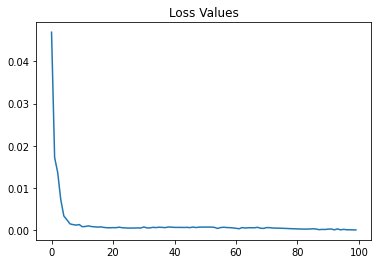

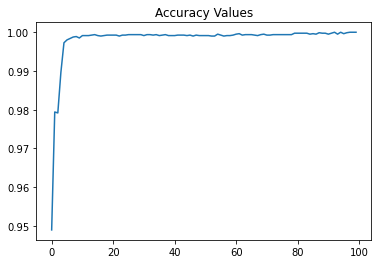

In [99]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Loss Values")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Accuracy Values")
plt.show()

In [100]:
def predict(data):
    HasilPredict = []
    for i in data:
      print(i)
      # Hidden Layer1
      o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
      o_hidden1 = sig(o_hidden1)
      # Hidden Layer2
      o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
      o_hidden2 = sig(o_hidden2)
      # Outpur Layer
      o_output  = np.matmul(o_hidden2, w_output) + b_output
      o_output  = sig(o_output)
      HasilPredict.append(o_output.round())
    return HasilPredict

In [101]:
#---------------------Testing--------------------------------
data_x_test     = data_test.iloc[:,1:23].values
data_y_test     = data_test.iloc[:,0].values

# Encoding
# x
for i in range(21):
  data_x_test[: , i] = LabelEncoder().fit_transform(data_x_test[:,i])
# y
data_y_test          = LabelEncoder().fit_transform(data_y_test)

# Normalize X
for i in range(14):
  for j in range(len(data_x_test)):
    data_x_test[j , i] = (data_x_test[j , i]- minn[i])/(maxx[i]-minn[i])

for i in range(15,21):
  for j in range(len(data_x_test)):
    data_x_test[j , i] = (data_x_test[j , i]- minn[i])/(maxx[i]-minn[i])

In [106]:
print(len(data_x[0]))

21


In [119]:
prediksi = predict([data_x[8111]])

[0.6 0.6666666666666666 0.8888888888888888 0.0 0.625 1.0 1.0 0.0
 0.6363636363636364 0.0 0.0 0.6666666666666666 0.875 0.875 0
 0.6666666666666666 1.0 1.0 0.875 0.4 0.16666666666666666]


In [120]:
print(prediksi)

[array([0.])]


In [111]:
data_train

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,1,0.666667,0.444444,1,0.75,1,0,1,0.363636,0,0.75,0.666667,0.875,0.875,0,0.666667,0.5,1,0.25,0.6,0.833333
1,e,1,0.666667,1,1,0,1,0,0,0.363636,0,0.5,0.666667,0.875,0.875,0,0.666667,0.5,1,0.375,0.4,0.166667
2,e,0,0.666667,0.888889,1,0.375,1,0,0,0.454545,0,0.5,0.666667,0.875,0.875,0,0.666667,0.5,1,0.375,0.4,0.5
3,p,1,1,0.888889,1,0.75,1,0,1,0.454545,0,0.75,0.666667,0.875,0.875,0,0.666667,0.5,1,0.25,0.6,0.833333
4,e,1,0.666667,0.333333,0,0.625,1,1,0,0.363636,1,0.75,0.666667,0.875,0.875,0,0.666667,0.5,0,0.375,0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,e,0,0.666667,0.888889,0,0.625,1,1,0,0.909091,0,0,0.666667,0.875,0.875,0,0.666667,1,1,0.875,0.4,0.166667
8110,e,1,0.666667,0.444444,0,0.625,0,0,0,0.545455,0,0,0.666667,0.625,0.625,0,0.333333,0.5,1,0.375,0.8,0.333333
8111,e,0.6,0.666667,0.888889,0,0.625,1,1,0,0.636364,0,0,0.666667,0.875,0.875,0,0.666667,1,1,0.875,0.4,0.166667
8112,e,0.6,0.666667,0.444444,0,0.625,0,0,0,0.545455,0,0,0.666667,0.625,0.625,0,0,0.5,1,0,0.8,0.333333


In [112]:
data_y

array([1, 0, 0, ..., 0, 0, 1])